# Demo Training & Testing of Word-Level Lip reading Model

### 0. Getting All necessary Dependencies

In [1]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:
# Making sure TF uses GPU
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 0.1 TEMP Visual Grid Corpus

In [10]:
from align import read_align_eng

align = read_align_eng("..\\Dataset\\GC\\s1\\bbaf2n.mpg")

print(align)

[['sil', 0.0, 0.95], ['bin', 0.95, 1.18], ['blue', 1.18, 1.36], ['at', 1.36, 1.42], ['f', 1.42, 1.64], ['two', 1.64, 1.89], ['now', 1.89, 2.12], ['sil', 2.12, 2.98]]


In [27]:


# loading video dsa gfg intro video
clip = VideoFileClip("../Dataset/GC/s1/bbaf2n.mpg")


# clipping of the video
# getting video for only starting 10 seconds
clip = clip.subclip(align[6][1], align[6][2])

# showing clip
clip.ipython_display(width = 280)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [38]:
# Temp dir list work
import os
  
# Get the list of all files and directories
# in the root directory
s_id = 1

for cnt in range(1,4):
    path = "..\\Dataset\\GC\\s"+str(cnt)
    break

dir_list = os.listdir(path)
dir_list.remove('align')  
print("Files and diraectories in '", path, "' :") 
  
# print the list
print(dir_list)

Files and diraectories in ' ..\Dataset\GC\s1 ' :
['bbaf2n.mpg', 'bbaf3s.mpg', 'bbaf4p.mpg', 'bbaf5a.mpg', 'bbal6n.mpg', 'bbal7s.mpg', 'bbal8p.mpg', 'bbal9a.mpg', 'bbas1s.mpg', 'bbas2p.mpg', 'bbas3a.mpg', 'bbaszn.mpg', 'bbaz4n.mpg', 'bbaz5s.mpg', 'bbaz6p.mpg', 'bbaz7a.mpg', 'bbbf6n.mpg', 'bbbf7s.mpg', 'bbbf8p.mpg', 'bbbf9a.mpg', 'bbbm1s.mpg', 'bbbm2p.mpg', 'bbbm3a.mpg', 'bbbmzn.mpg', 'bbbs4n.mpg', 'bbbs5s.mpg', 'bbbs6p.mpg', 'bbbs7a.mpg', 'bbbz8n.mpg', 'bbbz9s.mpg', 'bbie8n.mpg', 'bbie9s.mpg', 'bbif1a.mpg', 'bbifzp.mpg', 'bbil2n.mpg', 'bbil3s.mpg', 'bbil4p.mpg', 'bbil5a.mpg', 'bbir6n.mpg', 'bbir7s.mpg', 'bbir8p.mpg', 'bbir9a.mpg', 'bbiz1s.mpg', 'bbiz2p.mpg', 'bbiz3a.mpg', 'bbizzn.mpg', 'bbwg1s.mpg', 'bbwg2p.mpg', 'bbwg3a.mpg', 'bbwgzn.mpg', 'bbwm4n.mpg', 'bbwm5s.mpg', 'bbwm6p.mpg', 'bbwm7a.mpg', 'bbws8n.mpg', 'bbws9s.mpg', 'bbwt1a.mpg', 'bbwtzp.mpg', 'bgaa6n.mpg', 'bgaa7s.mpg', 'bgaa8p.mpg', 'bgaa9a.mpg', 'bgah1s.mpg', 'bgah2p.mpg', 'bgah3a.mpg', 'bgahzn.mpg', 'bgan4n.mpg', 'bgan5s.mpg'

### 1. Visualizing Dataset

In [5]:
classes_list = ['sil', 'at', 'five', 'bin', 'red', 'two', 'a', 'j', 'green', 'p', 'eight', 'now', 'place', 'again', 'f', 'b', 'nine', 'n', 'o', 'lay', 'with', 'g', 'q', 's', 'x', 'in', 'd', 'four', 'soon', 'one', 'k', 'v', 'please', 'c', 'e', 'y', 'z', 'i', 'blue', 'by', 'zero', 'l', 'u', 'seven', 't', 'set', 'h', 'three', 'r', 'm', 'white', 'six']
print(len(classes_list))
print(classes_list)

52
['sil', 'at', 'five', 'bin', 'red', 'two', 'a', 'j', 'green', 'p', 'eight', 'now', 'place', 'again', 'f', 'b', 'nine', 'n', 'o', 'lay', 'with', 'g', 'q', 's', 'x', 'in', 'd', 'four', 'soon', 'one', 'k', 'v', 'please', 'c', 'e', 'y', 'z', 'i', 'blue', 'by', 'zero', 'l', 'u', 'seven', 't', 'set', 'h', 'three', 'r', 'm', 'white', 'six']


In [6]:
from videos_eng import *

In [7]:
# loading video dsa gfg intro video
clip = VideoFileClip("..\\Dataset\\GC\\s1\\bbaf5a.mpg")

frames = clip_to_list(clip, 7)
#read_and_segment_video("..\\Dataset\\Urdu\\3\\aap_kese_hai_jee_kyun_do")

In [8]:
len(frames)

7

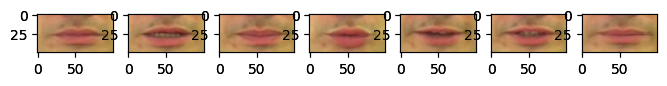

In [9]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 7
rows = 5
ind = 0
for i in range(1, columns*rows +1):
    img = frames[ind]
    fig.add_subplot(rows, columns, i)
    img = cv2.flip(img, 1)
    plt.imshow(img)
    ind+=1
    if(ind >= 7):
        break
ind = 0
for i in range(1, columns*rows +1):
    img = frames[ind]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    ind+=1
    if(ind >= 7):
        break
plt.show()

In [10]:
s = np.array(frames)

In [11]:
s.shape

(7, 50, 100, 3)

### 2. Getting Dataset

In [3]:
# Getting dataset generation function
from Dataset_eng import create_word_level_dataset

In [3]:
CLASSES_LIST = ['sil', 'at', 'five', 'bin', 'red', 'two', 'a', 'j', 'green', 'p', 'eight', 'now', 'place', 'again', 'f', 'b', 'nine', 'n', 'o', 'lay', 'with', 'g', 'q', 's', 'x', 'in', 'd', 'four', 'soon', 'one', 'k', 'v', 'please', 'c', 'e', 'y', 'z', 'i', 'blue', 'by', 'zero', 'l', 'u', 'seven', 't', 'set', 'h', 'three', 'r', 'm', 'white', 'six']

In [4]:
print(len(CLASSES_LIST))

52


In [5]:
# Currently processing only two videos(two sentences)
# CLASSES LIST HAS BEEN CHANGED INSIDE THE FUNCTION, CHANGE IT TO ORIGINAL WHEN TRAINING ON WHOLE DATASET
#features, labels = create_word_level_dataset()
#del features
#del labels
f1 = np.load('./s1_features.npy')
l1 = np.load('./s1_labels.npy')

In [39]:
print(len(features))
print(len(labels))
print(features.shape)
print(labels.shape)

NameError: name 'features' is not defined

In [6]:

features = f1[4012:6018]
labels = l1[4012:6018]
del f1
del l1
#np.save('s1_features', features)
#np.save('s1_labels', labels)

In [7]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [8]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [9]:
features_train.shape

(1504, 13, 50, 100, 3)

In [10]:
labels_train.shape

(1504, 52)

### 3. Training Model

In [11]:
# Important variables DEFINED IN PREPROCESSOR FILES
SEQUENCE_LENGTH = 13 
IMAGE_HEIGHT = 50 
IMAGE_WIDTH = 100

In [12]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

   # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='valid',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((2, 2)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='valid',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='valid',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [13]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 13, 48, 98, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 13, 24, 49, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 13, 24, 49, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 13, 22, 47, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 13, 11, 23, 32)   0

In [ ]:
LRCN_model.load_weights("s1_4012_6018_LRCN_model___Date_Time_2023_02_20__20_22_31___Loss_0.8602533340454102___Accuracy_0.7649402618408203.h5")

# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 300, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

In [16]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

16/16 [==============================] - 1s 33ms/step - loss: 0.8538 - accuracy: 0.7809


In [17]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f's1_6018_8024_LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the Model.
LRCN_model.save(model_file_name)

In [18]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

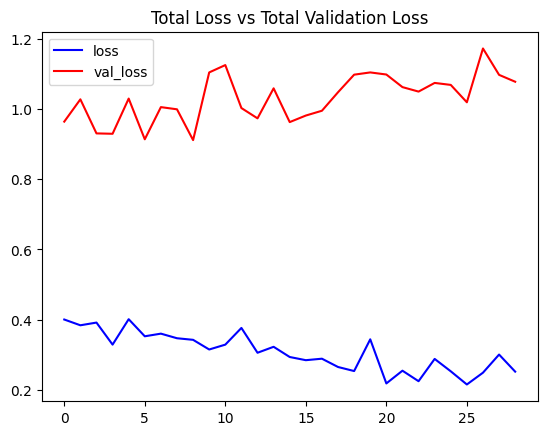

In [19]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

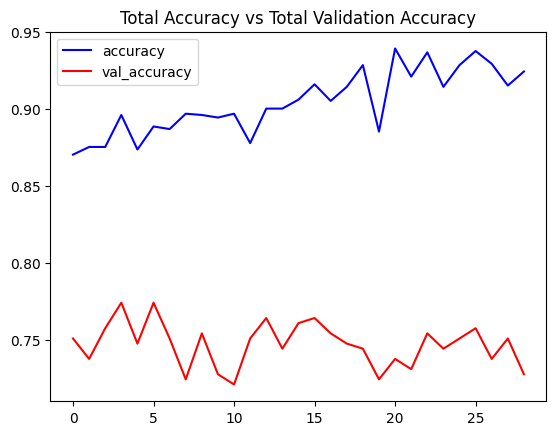

In [20]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [34]:
from lips import crop_lips
import mediapipe as mp

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

def predict_on_video(video_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform action recognition on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))


    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:
        # Iterate until the video is accessed successfully.
        while video_reader.isOpened():

            # Read the frame.
            ok, frame = video_reader.read() 

            # Check if frame is not read properly then break the loop.
            if not ok:
                break
            
            cropped_image = crop_lips(frame, holistic)

            # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
            normalized_frame = cropped_image / 255

            # Appending the pre-processed frame into the frames list.
            frames_queue.append(normalized_frame)

            # Check if the number of frames in the queue are equal to the fixed sequence length.
            if len(frames_queue) == SEQUENCE_LENGTH:

                # Pass the normalized frames to the model and get the predicted probabilities.
                predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_queue, axis = 0))[0]

                # Get the index of class with highest probability.
                predicted_label = np.argmax(predicted_labels_probabilities)

                # Get the class name using the retrieved index.
                predicted_class_name = CLASSES_LIST[predicted_label]
                
                print(predicted_class_name)

            # Write predicted class name on top of the frame.
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            #cv2.imshow("Result", frame)


        # Release the VideoCapture and VideoWriter objects.
        video_reader.release()


In [28]:
#LRCN_model.load_weights("LRCN_eng_model___Date_Time_2023_02_13__00_24_29___Loss_1.8407708406448364___Accuracy_0.4947916567325592.h5")

In [35]:
# Perform Action Recognition on the Test Video.
predict_on_video("..\\Dataset\\GC\\s1\\bbaf2n.mpg", SEQUENCE_LENGTH)

1/1 [==============================] - 0s 19ms/step
sil
1/1 [==============================] - 0s 19ms/step
sil
1/1 [==============================] - 0s 20ms/step
sil
1/1 [==============================] - 0s 19ms/step
sil
1/1 [==============================] - 0s 19ms/step
sil
1/1 [==============================] - 0s 20ms/step
sil
1/1 [==============================] - 0s 20ms/step
sil
1/1 [==============================] - 0s 21ms/step
sil
1/1 [==============================] - 0s 22ms/step
sil
1/1 [==============================] - 0s 20ms/step
sil
1/1 [==============================] - 0s 23ms/step
sil
1/1 [==============================] - 0s 21ms/step
sil
1/1 [==============================] - 0s 21ms/step
sil
1/1 [==============================] - 0s 21ms/step
sil
1/1 [==============================] - 0s 20ms/step
sil
1/1 [==============================] - 0s 21ms/step
sil
1/1 [==============================] - 0s 21ms/step
sil
1/1 [==============================] - 0s 18ms/s